In [20]:
import pandas as pd
import numpy as np

In [21]:
df=pd.read_csv('data/df_fe.csv', sep=",")
#df['Date'] = pd.to_datetime(df['Date'])

#df.drop(index=1, inplace=True)
df.head(3)

,Open,High,Low,Close,Adj Close,Volume($),Symbol,Daily Return,SMA_30,SMA_60,...,Close_rolling_std_7,Volume_rolling_mean_7,Volume_rolling_std_7,Close_rolling_mean_30,Close_rolling_std_30,Volume_rolling_mean_30,Volume_rolling_std_30,Year,Month,Day
0,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,BTC,0.012842,22428.243750,19715.608773,...,1284.059118,4.970113e+10,8.115395e+09,22428.243750,3661.566866,3.886562e+10,1.223869e+10,2021,1,1
1,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,BTC,0.093726,22850.972721,20018.558219,...,1936.633106,5.249153e+10,1.055716e+10,22850.972721,4019.854985,4.006346e+10,1.325301e+10,2021,1,2
2,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,BTC,0.020380,23320.381315,20329.363493,...,2189.909798,5.423229e+10,1.376529e+10,23320.381315,4328.735995,4.155655e+10,1.494648e+10,2021,1,3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open                    16044 non-null  float64
 1   High                    16044 non-null  float64
 2   Low                     16044 non-null  float64
 3   Close                   16044 non-null  float64
 4   Adj Close               16044 non-null  float64
 5   Volume($)               16044 non-null  int64  
 6   Symbol                  16044 non-null  object 
 7   Daily Return            16044 non-null  float64
 8   SMA_30                  16044 non-null  float64
 9   SMA_60                  16044 non-null  float64
 10  SMA_90                  16044 non-null  float64
 11  EMA_30                  16044 non-null  float64
 12  EMA_60                  16044 non-null  float64
 13  EMA_90                  16044 non-null  float64
 14  RSI                     16044 non-null

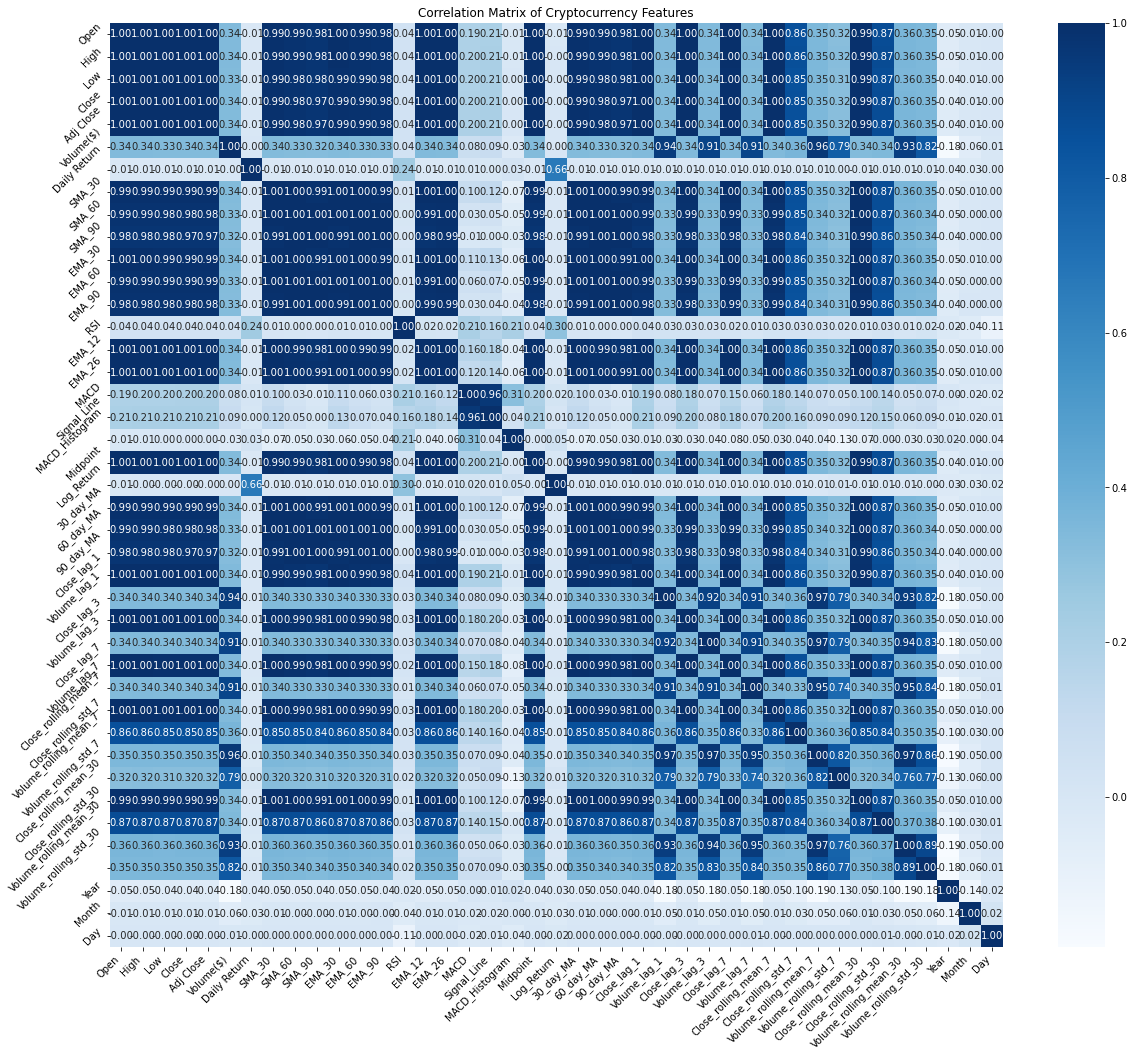

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation analysis
df_numerical = df.select_dtypes(include=['float64', 'int64'])


corr = df_numerical.corr()


sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f")

plt.figure(figsize=(20, 17))
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)
plt.title("Correlation Matrix of Cryptocurrency Features")
plt.show()

#### onehotencoding 

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

artists_column = df['Symbol'].values.reshape(-1, 1)

one_hot_encoded_artists = one_hot_encoder.fit_transform(artists_column)

df['Symbol'] = np.argmax(one_hot_encoded_artists, axis=1)

#### Feature Importance

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

#df['Date'] = pd.to_datetime(df['Date'])


X = df.drop('Close', axis=1) 
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier if it's a classification task


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [28]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(importance_df)


                   Feature    Importance
3                Adj Close  3.173787e-01
24             Close_lag_1  2.019846e-01
2                      Low  1.686408e-01
19                Midpoint  1.164356e-01
1                     High  1.061058e-01
0                     Open  7.137775e-02
26             Close_lag_3  9.459107e-03
10                  EMA_30  1.332307e-03
9                   SMA_90  1.147870e-03
15                  EMA_26  9.685786e-04
12                  EMA_90  7.802251e-04
14                  EMA_12  7.165193e-04
21               30_day_MA  6.745646e-04
28             Close_lag_7  6.222780e-04
34   Close_rolling_mean_30  5.735432e-04
7                   SMA_30  5.124389e-04
11                  EMA_60  4.064833e-04
8                   SMA_60  2.927995e-04
22               60_day_MA  2.421558e-04
30    Close_rolling_mean_7  2.151259e-04
23               90_day_MA  1.191068e-04
36  Volume_rolling_mean_30  2.530072e-06
31     Close_rolling_std_7  1.736459e-06
13              

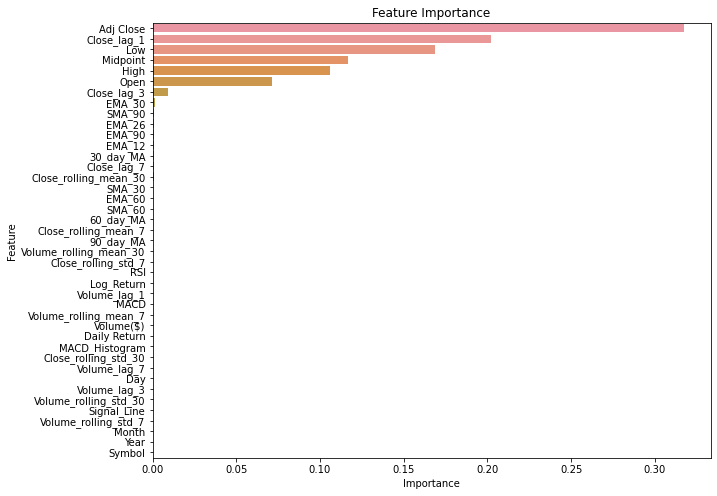

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#### Recursive Feature Elimination (RFE):
RFE is a technique that fits a model and removes the weakest feature (or features) until the specified number of features is reached. How can I perform 

In [30]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(random_state=42)

# Initialize RFE with the estimator and the desired number of features
selector = RFE(estimator, n_features_to_select=10, step=1) 
selector = selector.fit(X_train, y_train)
 
selected_features_mask = selector.support_

feature_ranking = selector.ranking_

# Transform the dataset to the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
 
selected_features = X_train.columns[selected_features_mask]
print(f"Selected features: {selected_features}")

# And to see the ranking of all features
ranking_df = pd.DataFrame({'Feature': X_train.columns, 'Ranking': feature_ranking})
print(ranking_df.sort_values(by='Ranking'))


Selected features: Index(['Open', 'High', 'Low', 'Adj Close', 'EMA_90', 'Midpoint', '90_day_MA',
       'Close_lag_1', 'Close_lag_7', 'Close_rolling_mean_30'],
      dtype='object')
                   Feature  Ranking
0                     Open        1
28             Close_lag_7        1
12                  EMA_90        1
19                Midpoint        1
23               90_day_MA        1
34   Close_rolling_mean_30        1
3                Adj Close        1
2                      Low        1
1                     High        1
24             Close_lag_1        1
11                  EMA_60        2
15                  EMA_26        3
7                   SMA_30        4
9                   SMA_90        5
21               30_day_MA        6
8                   SMA_60        7
22               60_day_MA        8
26             Close_lag_3        9
14                  EMA_12       10
10                  EMA_30       11
30    Close_rolling_mean_7       12
31     Close_rolling_std_7

#### PCA test

##### reduce redundancy 

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA. For example, to keep 95% of variance, set n_components to 0.95
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Interpret the results
print(f"Number of components to explain 95% variance: {pca.n_components_}")
print(f"Explained variance by component: {pca.explained_variance_ratio_}")

# 'X_pca' is the transformed data with reduced dimensions


Number of components to explain 95% variance: 10
Explained variance by component: [0.57921078 0.14735584 0.05432051 0.0435825  0.0278368  0.02630038
 0.02335041 0.0216308  0.01928146 0.01726646]


In [36]:
X

,Open,High,Low,Adj Close,Volume($),Symbol,Daily Return,SMA_30,SMA_60,SMA_90,...,Close_rolling_std_7,Volume_rolling_mean_7,Volume_rolling_std_7,Close_rolling_mean_30,Close_rolling_std_30,Volume_rolling_mean_30,Volume_rolling_std_30,Year,Month,Day
0,28994.009766,29600.626953,28803.585938,29374.152344,40730301359,3,0.012842,22428.243750,19715.608773,17188.618815,...,1284.059118,4.970113e+10,8.115395e+09,22428.243750,3661.566866,3.886562e+10,1.223869e+10,2021,1,1
1,29376.455078,33155.117188,29091.181641,32127.267578,67865420765,3,0.093726,22850.972721,20018.558219,17427.037533,...,1936.633106,5.249153e+10,1.055716e+10,22850.972721,4019.854985,4.006346e+10,1.325301e+10,2021,1,2
2,32129.408203,34608.558594,32052.316406,32782.023438,78665235202,3,0.020380,23320.381315,20329.363493,17671.356239,...,2189.909798,5.423229e+10,1.376529e+10,23320.381315,4328.735995,4.155655e+10,1.494648e+10,2021,1,3
3,32810.949219,33440.218750,28722.755859,31971.914062,81163475344,3,-0.024712,23747.637435,20602.564583,17908.772993,...,2063.049095,5.881897e+10,1.677368e+10,23747.637435,4531.181152,4.335392e+10,1.634268e+10,2021,1,4
4,31977.041016,34437.589844,30221.187500,33992.429688,67547324782,3,0.063197,24235.881055,20909.673730,18167.922559,...,2060.489590,6.200202e+10,1.586251e+10,24235.881055,4820.354256,4.476237e+10,1.655196e+10,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,2.143799,2.163639,2.101517,2.160291,4133447,10,0.011708,2.055781,2.129682,2.179435,...,0.048673,4.828611e+06,3.207028e+06,2.055781,0.056420,5.057321e+06,6.574886e+06,2024,2,16
16040,2.159645,2.638445,2.156239,2.587086,170975160,10,0.197564,2.069408,2.137288,2.182912,...,0.191588,2.900185e+07,6.267185e+07,2.069408,0.110488,9.749322e+06,3.078794e+07,2024,2,17
16041,2.592313,2.732283,2.424762,2.539670,127117928,10,-0.018328,2.083711,2.143002,2.186221,...,0.229593,4.639731e+07,7.131584e+07,2.083711,0.139868,1.378169e+07,3.749190e+07,2024,2,18
16042,2.544140,2.547866,2.418916,2.425865,27400641,10,-0.044811,2.092877,2.146604,2.189637,...,0.226629,4.870266e+07,7.024358e+07,2.092877,0.152832,1.464284e+07,3.749834e+07,2024,2,19


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming X_train and X_test are your data

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# variance tells you how much information (variance) can be attributed to each principal component
print(pca.explained_variance_ratio_)

[0.57860981 0.14757655 0.05423968 0.04368108 0.02802764 0.02632905
 0.02330035 0.02163788 0.0192254  0.01725892]


In [38]:
X_train_pca

array([[-1.58501079e+00, -9.02612147e-01,  4.07908027e-01, ...,
        -1.03023437e-02, -8.38887653e-01, -7.26428105e-01],
       [-1.64175195e+00, -8.40279292e-01,  1.17440970e-01, ...,
        -9.27816229e-01, -5.06125119e-01, -1.30745515e-01],
       [ 1.68634802e+01, -1.47805002e+00,  3.43981045e+00, ...,
         4.96910526e-01,  4.38203821e-01, -4.15639613e-01],
       ...,
       [ 1.21693751e+01, -2.31027255e+00,  1.72854389e+00, ...,
        -4.02360454e-01, -4.78283725e-01, -3.01368771e-01],
       [-1.67537782e+00, -7.94071990e-01,  2.91848246e-01, ...,
        -1.14346002e+00, -1.00963855e-01, -1.22645910e+00],
       [-1.46911077e+00, -7.63077375e-01,  5.33538714e-01, ...,
         1.99815154e+00, -2.29998154e-01, -5.73038818e-01]])